In [1]:
import pandas as pd
import sqlite3

In [2]:
logs_db = sqlite3.connect('logs_db.db')

In [3]:
# create df from db
logs_feb_df = pd.read_sql_query('SELECT * from data_use WHERE date > 20161231 AND date < 20170201', logs_db)

In [4]:
logs_feb_df.head()

,index,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,14,yxiEWwE9VR5utpUecLxVdQ5B7NysUPfrNtGINaM2zA8=,20170106,0,0,0,1,39,38,10123.228
1,17,PNxIsSLWOJDCm7pNPFzRO/6Mmg2WeZA2nf6hw6t1x3g=,20170106,2,1,0,0,35,34,7563.936
2,21,KXF9c/T66LZIzFq+xS64icWMhDQE6miCZAtdXRjZHX8=,20170116,1,1,0,0,9,6,1980.156
3,45,zD6AnHn/qhjoROJjnwmKUsKJ1Xj4nZ3fJzVShr+LISo=,20170129,4,0,0,1,3,5,354.214
4,57,OcZ3fKQzHrL1BuzuFRzUiwPr8l9P8JKCFpafdYf5sCY=,20170109,0,0,0,0,3,3,766.431


In [5]:
logs_feb_df.drop('index', axis=1, inplace=True)

In [6]:
logs_feb_df.shape

(17908094, 9)

In [7]:
logs_feb_df.date.min(), logs_feb_df.date.max()

(20170101, 20170131)

In [8]:
logs_feb_df.isnull().sum()

msno          0
date          0
num_25        0
num_50        0
num_75        0
num_985       0
num_100       0
num_unq       0
total_secs    0
dtype: int64

In [9]:
# keep most recent log date
logs_feb_df_sorted = logs_feb_df.sort_values(['msno', 'date'], 
                                              ascending=False).reset_index(drop = True)
logs_feb_df_sorted.head(10)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170130,0,0,0,1,16,17,3923.886
1,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170127,0,0,1,0,1,2,1083.100
2,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170121,0,0,0,0,19,13,9222.427
3,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170120,0,1,1,1,10,10,5524.434
4,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170118,0,1,0,0,14,13,7544.795
5,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170116,1,0,1,0,11,8,6356.727
6,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170113,0,0,1,0,19,13,9592.948
7,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170112,1,0,0,0,7,7,3325.994
8,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170111,9,1,0,0,13,14,7101.579
9,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170110,4,0,0,0,10,12,4766.240


In [10]:
logs_feb_last_df = logs_feb_df_sorted.drop_duplicates(subset='msno', keep='first').reset_index(drop=True)
logs_feb_last_df.columns = logs_feb_last_df.columns + '_last'
logs_feb_last_df = logs_feb_last_df.rename(columns={'msno_last': 'msno'})
logs_feb_last_df['date_last_dt'] = pd.to_datetime(logs_feb_last_df['date_last'], 
                                                        format='%Y%m%d',
                                                        errors='ignore')    

logs_feb_last_df['days_from_last_log'] = 31 - logs_feb_last_df['date_last_dt'].dt.day
logs_feb_last_df

,msno,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,date_last_dt,days_from_last_log
0,zzzF1KsGfHH3qI6qiSNSXC35UXmVKMVFdxkp7xmDMc0=,20170130,0,0,0,1,16,17,3923.886,2017-01-30,1
1,zzz4xr5LLzoxUqD6LfKiieCt8Or4dUWFQ0RA5gmkx8I=,20170127,0,0,1,0,1,2,1083.100,2017-01-27,4
2,zzz1Dc3P9s53HAowRTrm3fNsWju5yeN4YBfNDq7Z99Q=,20170129,12,3,0,0,3,17,1092.272,2017-01-29,2
3,zzyHq6TK2+cBkeGFUHvh12Z7UxFZiSM7dOOSllSBPDw=,20170109,1,0,1,0,4,6,1039.258,2017-01-09,22
4,zzy7iqSpfcRq7R4hmKKuhI+CJRs79a6pteqEggpiNO0=,20170131,12,3,2,1,16,31,4514.703,2017-01-31,0
...,...,...,...,...,...,...,...,...,...,...,...
1135998,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,20170128,1,0,1,1,19,12,5266.401,2017-01-28,3
1135999,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,20170131,0,1,3,0,0,4,447.402,2017-01-31,0
1136000,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,20170131,0,0,0,1,7,8,2280.970,2017-01-31,0
1136001,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,20170131,1,0,0,3,3,6,1580.173,2017-01-31,0


In [11]:
# Aggregation sum

In [12]:
logs_feb_sum_df = logs_feb_df.copy()
logs_feb_sum_df.columns

Index(['msno', 'date', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
       'num_unq', 'total_secs'],
      dtype='object')

In [13]:
logs_feb_sum_df.drop('date', axis=1, inplace=True)

In [14]:
logs_feb_sum_df = logs_feb_sum_df.groupby('msno').sum().reset_index()
logs_feb_sum_df.columns = logs_feb_sum_df.columns + '_sum' 
logs_feb_sum_df = logs_feb_sum_df.rename(columns={'msno_sum': 'msno'})

In [15]:
logs_feb_sum_df.head()

,msno,num_25_sum,num_50_sum,num_75_sum,num_985_sum,num_100_sum,num_unq_sum,total_secs_sum
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,89,9,14,9,1119,1153,276006.651
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,135,69,78,147,438,696,157868.677
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,108,36,30,75,715,840,198105.280
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,289,175,97,82,651,1088,215757.136
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,54,9,8,21,384,130,106043.142


In [16]:
logs_feb_sum_df.msno.nunique()

1136003

In [17]:
# Aggregation mean

In [18]:
logs_feb_mean_df = logs_feb_df.copy()
logs_feb_mean_df.drop('date', axis=1, inplace=True)
logs_feb_mean_df = logs_feb_mean_df.groupby('msno').mean().reset_index()
logs_feb_mean_df.columns = logs_feb_mean_df.columns + '_mean' 
logs_feb_mean_df = logs_feb_mean_df.rename(columns={'msno_mean': 'msno'})

In [19]:
logs_feb_mean_df.head()

,msno,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,+++IZseRRiQS9aaSkH6cMYU6bGDcxUieAi/tH67sC5s=,3.869565,0.391304,0.608696,0.391304,48.652174,50.130435,12000.289174
1,+++hVY1rZox/33YtvDgmKA2Frg/2qhkz12B9ylCvh8o=,4.500000,2.300000,2.600000,4.900000,14.600000,23.200000,5262.289233
2,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,3.483871,1.161290,0.967742,2.419355,23.064516,27.096774,6390.492903
3,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,10.703704,6.481481,3.592593,3.037037,24.111111,40.296296,7991.005037
4,++/9R3sX37CjxbY/AaGvbwr3QkwElKBCtSvVzhCBDOk=,2.000000,0.333333,0.296296,0.777778,14.222222,4.814815,3927.523778


In [20]:
logs_feb_mean_df.msno.nunique()

1136003

In [21]:
train = pd.read_pickle('Data/train_v1_scala_clean.pickle')

In [22]:
logs_feb = pd.merge(train, logs_feb_last_df, on='msno', how='left')
logs_feb = pd.merge(logs_feb, logs_feb_sum_df, on='msno', how='left')
logs_feb = pd.merge(logs_feb, logs_feb_mean_df, on='msno', how='left')
logs_feb.head()

,msno,is_churn,date_last,num_25_last,num_50_last,num_75_last,num_985_last,num_100_last,num_unq_last,total_secs_last,...,num_100_sum,num_unq_sum,total_secs_sum,num_25_mean,num_50_mean,num_75_mean,num_985_mean,num_100_mean,num_unq_mean,total_secs_mean
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0.0,20170114.0,0.0,0.0,0.0,0.0,3.0,3.0,545.123,...,87.0,182.0,27020.062,6.000000,1.076923,0.846154,0.692308,6.692308,14.000000,2078.466308
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0.0,20170131.0,21.0,2.0,2.0,0.0,7.0,32.0,2378.958,...,833.0,1498.0,233828.809,30.086957,1.782609,1.826087,1.043478,36.217391,65.130435,10166.469957
3,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0.0,20170131.0,5.0,1.0,0.0,2.0,13.0,8.0,3185.207,...,978.0,887.0,259543.699,7.307692,1.538462,1.346154,2.269231,37.615385,34.115385,9982.449962
4,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0.0,20170131.0,9.0,0.0,1.0,5.0,23.0,35.0,7123.909,...,1149.0,972.0,285971.604,3.148148,0.555556,0.444444,0.518519,42.555556,36.000000,10591.540889


In [23]:
logs_feb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879537 entries, 0 to 879536
Data columns (total 26 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   msno                879537 non-null  object        
 1   is_churn            879537 non-null  float64       
 2   date_last           679538 non-null  float64       
 3   num_25_last         679538 non-null  float64       
 4   num_50_last         679538 non-null  float64       
 5   num_75_last         679538 non-null  float64       
 6   num_985_last        679538 non-null  float64       
 7   num_100_last        679538 non-null  float64       
 8   num_unq_last        679538 non-null  float64       
 9   total_secs_last     679538 non-null  float64       
 10  date_last_dt        679538 non-null  datetime64[ns]
 11  days_from_last_log  679538 non-null  float64       
 12  num_25_sum          679538 non-null  float64       
 13  num_50_sum          679538 no

<AxesSubplot:>

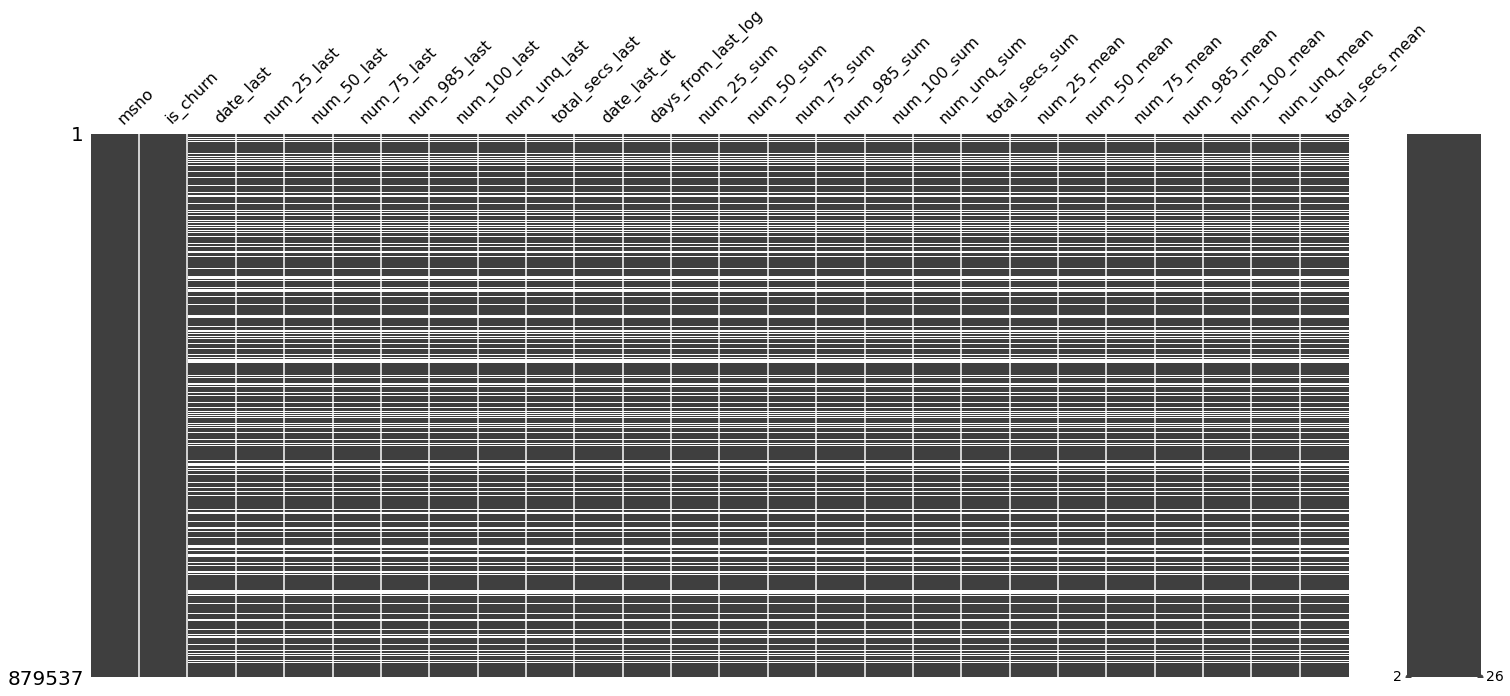

In [24]:
import missingno as ms
import matplotlib.pyplot as plt 

ms.matrix(logs_feb)

In [25]:
import pickle

with open('Data/Processed/logs_feb.pickle', 'wb') as handle:
    pickle.dump(logs_feb, handle)